In [1]:
import fastf1
import fastf1.plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
race = fastf1.get_session(2023, 'Austria', 'R')
race.load()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.1.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

In [14]:
ham_laps = race.laps.pick_driver('HAM').pick_quicklaps().reset_index()
lec_laps = race.laps.pick_driver('LEC').pick_quicklaps().reset_index()
# Convert laptime to seconds
ham_laps['LapTime'] = ham_laps['LapTime'].apply(lambda x: x.total_seconds())
lec_laps['LapTime'] = lec_laps['LapTime'].apply(lambda x: x.total_seconds())

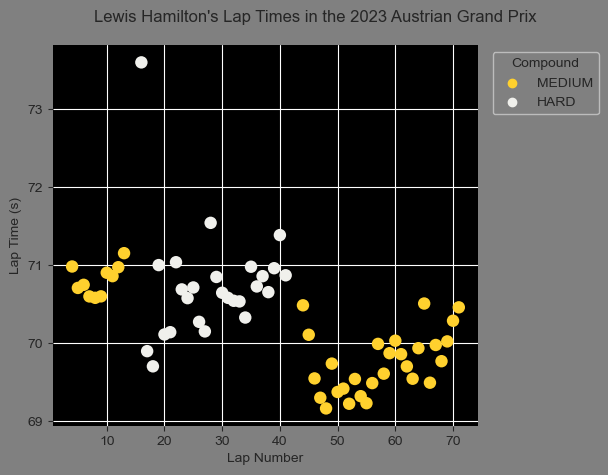

In [16]:
sns.set_style("ticks", rc = {"axes.facecolor": "black", "figure.facecolor": "grey"})
fig, ax = plt.subplots()

sns.scatterplot(data = ham_laps, x = "LapNumber", y = "LapTime",
                ax = ax, hue = "Compound", palette = fastf1.plotting.COMPOUND_COLORS,
                s = 80, linewidth = 0, legend = "auto")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Lewis Hamilton's Lap Times in the 2023 Austrian Grand Prix")
plt.grid(color = "w", which = 'major', axis = 'both')
sns.despine(left = True, bottom = True)
# get the plot's legend
leg = ax.get_legend()
# put the legend out of the plot
leg.set_bbox_to_anchor((1.3, 1))
# set the legend's background to transparent
frame = leg.get_frame()
frame.set_facecolor('none')
plt.tight_layout()
plt.show()

In [26]:
# Calculate the lap time difference between HAM and LEC
lap_time_difference = ham_laps['LapTime'] - lec_laps['LapTime']

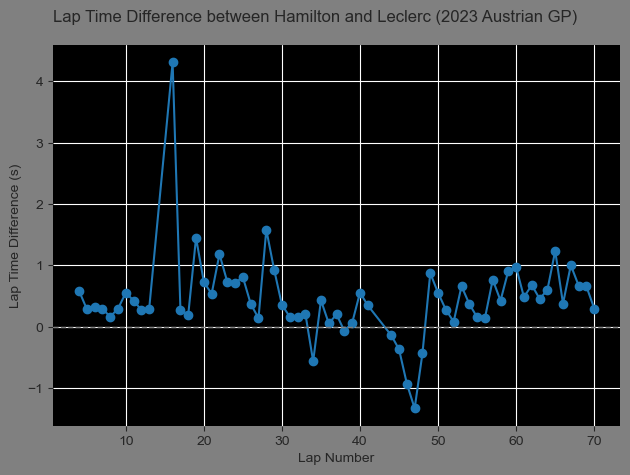

Recommendation: Consider pitting on laps [10, 13, 16, 22, 57, 59] for a strategic advantage.


In [22]:
# Plot lap time difference
fig, ax_diff = plt.subplots()
ax_diff.plot(ham_laps['LapNumber'], lap_time_difference, marker='o')
ax_diff.axhline(y=0, color='gray', linestyle='--', linewidth=1, label='Equal Lap Time')

ax_diff.set_xlabel("Lap Number")
ax_diff.set_ylabel("Lap Time Difference (s)")
plt.suptitle("Lap Time Difference between Hamilton and Leclerc (2023 Austrian GP)")
plt.grid(color="w", which='major', axis='both')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Identify when to pit based on lap time difference
threshold_time_difference = 1  # Set your threshold for pitting
pit_indices = lap_time_difference[lap_time_difference > threshold_time_difference].index

if not pit_indices.empty:
    print(f"Recommendation: Consider pitting on laps {pit_indices.values.tolist()} for a strategic advantage.")
else:
    print("No clear advantage gained by pitting based on current lap time difference.")


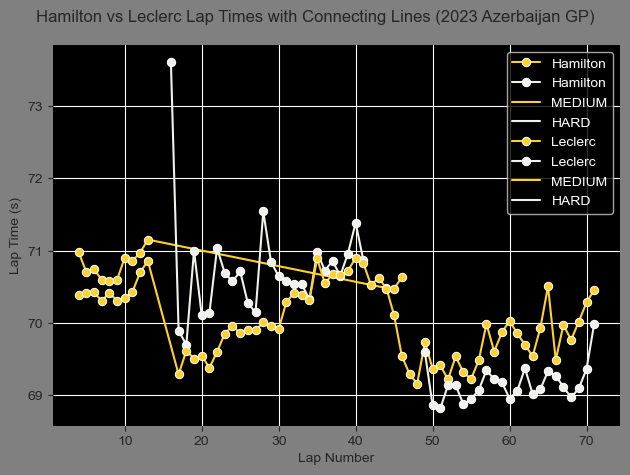

In [35]:
# Plot both drivers' lap times with connecting lines
fig, ax_both = plt.subplots()

# Plot Hamilton's lap times with connecting lines
sns.lineplot(data=ham_laps, x="LapNumber", y="LapTime",
             ax=ax_both, hue="Compound", palette=fastf1.plotting.COMPOUND_COLORS,
             marker='o', label='Hamilton')

# Plot Leclerc's lap times with connecting lines
sns.lineplot(data=lec_laps, x="LapNumber", y="LapTime",
             ax=ax_both, hue="Compound", palette=fastf1.plotting.COMPOUND_COLORS,
             marker='o', label='Leclerc')

ax_both.set_xlabel("Lap Number")
ax_both.set_ylabel("Lap Time (s)")
plt.suptitle("Hamilton vs Leclerc Lap Times with Connecting Lines (2023 Azerbaijan GP)")
plt.grid(color="w", which='major', axis='both')
sns.despine(left=True, bottom=True)
legend = plt.legend()
legend.get_texts()[0].set_color("white")  
legend.get_texts()[1].set_color("white") 
legend.get_texts()[2].set_color("white")  
legend.get_texts()[3].set_color("white")
legend.get_texts()[4].set_color("white")  
legend.get_texts()[5].set_color("white")
legend.get_texts()[6].set_color("white")  
legend.get_texts()[7].set_color("white")
plt.tight_layout()
plt.show()

AttributeError: 'Line2D' object has no property 'line_kws'

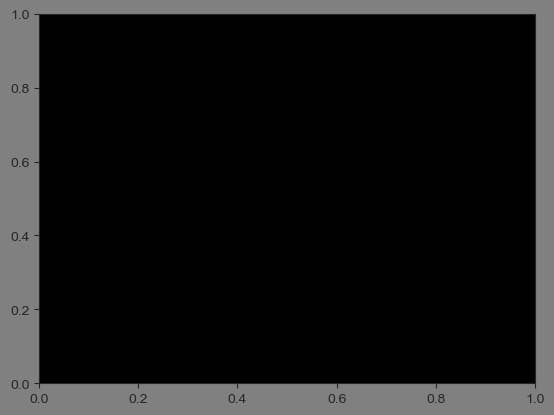

In [37]:
# Plot both drivers' lap times with connecting lines
fig, ax_both = plt.subplots()

# Plot Hamilton's lap times with connecting lines
sns.lineplot(data=ham_laps, x="LapNumber", y="LapTime",
             ax=ax_both, hue="Compound", palette=fastf1.plotting.COMPOUND_COLORS,
             marker='o', label='Hamilton', line_kws={'color': 'lightblue'})

# Plot Leclerc's lap times with connecting lines
sns.lineplot(data=lec_laps, x="LapNumber", y="LapTime",
             ax=ax_both, hue="Compound", palette=fastf1.plotting.COMPOUND_COLORS,
             marker='o', label='Leclerc', line_kws={'color': 'red'})

ax_both.set_xlabel("Lap Number")
ax_both.set_ylabel("Lap Time (s)")
plt.suptitle("Hamilton vs Leclerc Lap Times with Connecting Lines (2023 Azerbaijan GP)")
plt.grid(color="w", which='major', axis='both')
sns.despine(left=True, bottom=True)
legend = plt.legend()
legend.get_texts()[0].set_color("white")  # Set Hamilton's legend text color to white
legend.get_texts()[1].set_color("white")  # Set Leclerc's legend text color to white
plt.tight_layout()
plt.show()